In [29]:
from sklearn import datasets
import pandas as pd
import seaborn as sns

In [30]:
# Carregamos o dataset e adicionamos um label para cada uma das classes

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [31]:
# Imprime os 5 primeiros registros do nosso DF

iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label species  
0      0  setosa  
1      0  setosa  
2      0  setosa  
3      0  setosa  
4      0  setosa

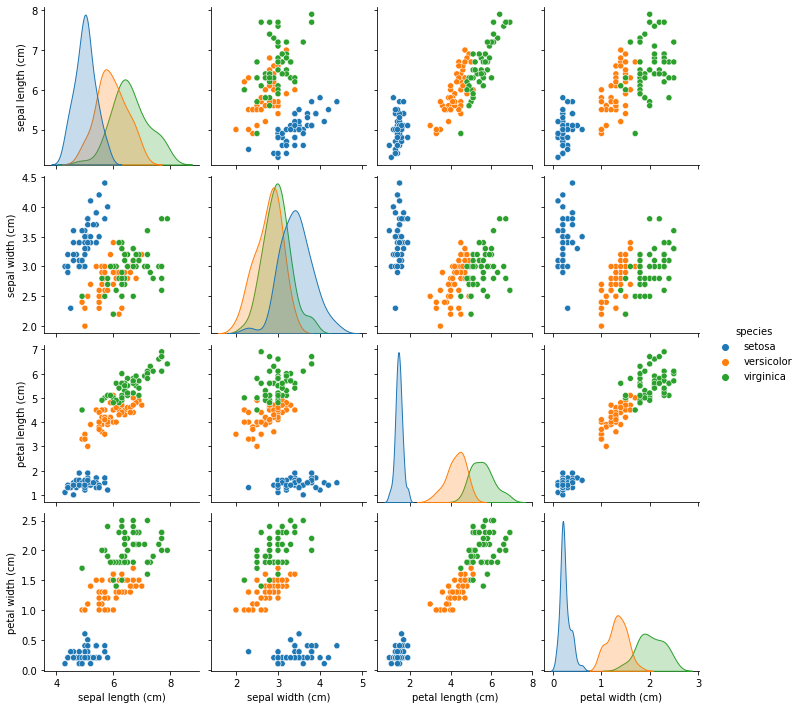

In [32]:
# Plota os gráficos aos pares de nossos atributos

sns.pairplot(iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)','species']], hue='species')

### Classificação

In [33]:
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [34]:
# X recebe uma matriz com as features do dataset
# y recebe o label da classe de cada uma das espécies

X, y = load_iris(return_X_y=True)

In [35]:
# Separamos o dataset em casos de treino e casos de teste. 70% e 30%, respectivamente.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [36]:
# Treinamos o dataset com o algoritmo classificador MLP

clf = MLPClassifier(random_state = 1, learning_rate_init=0.003 ,max_iter=10000)

In [37]:
# Executamos o fit para os casos de treino

clf.fit(X_train, y_train)

MLPClassifier(learning_rate_init=0.003, max_iter=10000, random_state=1)

In [38]:
# Classificamos os casos de teste com base no resultado do treino

y_pred = clf.predict(X_test)

In [39]:
# Saída obtida

y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0,
       2])

In [40]:
# Saída que era esperada

y_test

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0,
       2])

In [41]:
# Calculamos o score dos acertos

clf.score(X_test,y_test)

0.9555555555555556

In [42]:
# Plota gráfico com os resultados um pouco mais detalhados

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      0.86      0.92        14
   virginica       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [43]:
# Imprime a acurácia final do MLP para o Dataset Íris

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)
print("Acurácia do MLP: " + str(accuracy_percentage) + "%")

Acurácia do MLP: 95.56%
